In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import Sequential

In [2]:
drive.mount('/content/drive',force_remount=True)

# Paramters for the loader
batch_size = 32
img_width = 250
img_height = 250

# Training dataset
train_dir2 = 'drive/MyDrive/imageset/train'
train_dataset = image_dataset_from_directory(
    train_dir2,
    shuffle=True,
    batch_size=batch_size,
    image_size=(img_height, img_width))



Mounted at /content/drive
Found 9469 files belonging to 10 classes.


In [3]:
# Validation dataset
val_dir2 = 'drive/MyDrive/imageset/val'
val_dataset = image_dataset_from_directory(
    val_dir2,
    shuffle=True,
    batch_size=batch_size,
    image_size=(img_height, img_width))

Found 3925 files belonging to 10 classes.


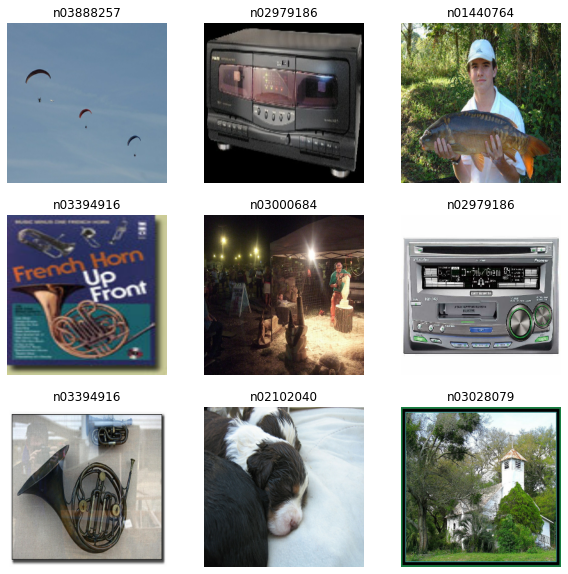

In [43]:
# Visualizing the data from the train_dataset
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
# Preview of the shape of tensor image_batch and label_batch
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 250, 250, 3)
(32,)


**image_batch** = batch of 32 images of the shape 250x250x3 (3 color channels RGB).<br>
**label_batch** = corresponding labels to the 32 images

In [6]:
# Checking class names
class_names

['n01440764',
 'n02102040',
 'n02979186',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n03425413',
 'n03445777',
 'n03888257']

**Create the model**

In [8]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
  ])

**Compile the model**

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Summary**

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1

**Train the model**

In [11]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data = val_dataset,
  epochs=epochs
)

Epoch 1/10
296/296 [==============================] - 954s 3s/step - loss: 1.6644 - accuracy: 0.4438 - val_loss: 1.2682 - val_accuracy: 0.5839
Epoch 2/10
296/296 [==============================] - 560s 2s/step - loss: 1.0496 - accuracy: 0.6604 - val_loss: 1.1564 - val_accuracy: 0.6357
Epoch 3/10
296/296 [==============================] - 561s 2s/step - loss: 0.6382 - accuracy: 0.7967 - val_loss: 1.2414 - val_accuracy: 0.6362
Epoch 4/10
296/296 [==============================] - 562s 2s/step - loss: 0.2868 - accuracy: 0.9122 - val_loss: 1.8114 - val_accuracy: 0.6076
Epoch 5/10
296/296 [==============================] - 562s 2s/step - loss: 0.1358 - accuracy: 0.9587 - val_loss: 2.3007 - val_accuracy: 0.5868
Epoch 6/10
296/296 [==============================] - 571s 2s/step - loss: 0.1043 - accuracy: 0.9679 - val_loss: 2.4073 - val_accuracy: 0.5880
Epoch 7/10
296/296 [==============================] - 565s 2s/step - loss: 0.0579 - accuracy: 0.9833 - val_loss: 2.7286 - val_accuracy: 0.5903

**Visualization**

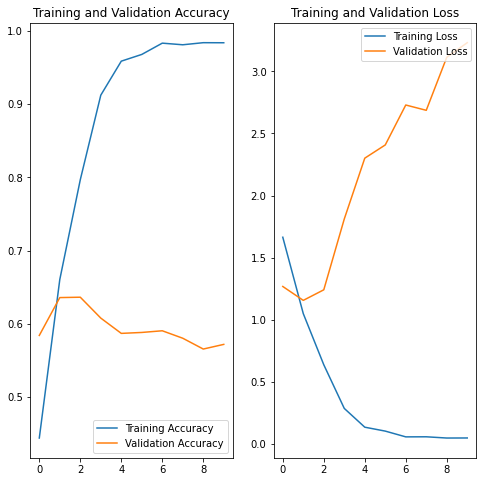

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show the training accuracy increases linearly over 10 epochs reaching 98%. However, there is a big difference to the validation set where it peaked at around 64% and then drops to just 57% accuracy. This observation indicates overfitting, it comes to no surprise as the datasets we are using are quite small - resulting in the model picking up noise or learning from unnecessary details, having negative impact on its performance and becomes challenging to generalize on a new dataset. We can perform data augmentation to prevent overfitting in our future iterations to gain a better accuracy on the validation set.

Training loss started high at 1.67 and decreased over time, however it linearly increased, reach 3.2 for the validation dataset which is undesirable as the aim is to keep the loss to a minimum.

**Data Augmentation**

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

**Visualize after Augmentation**

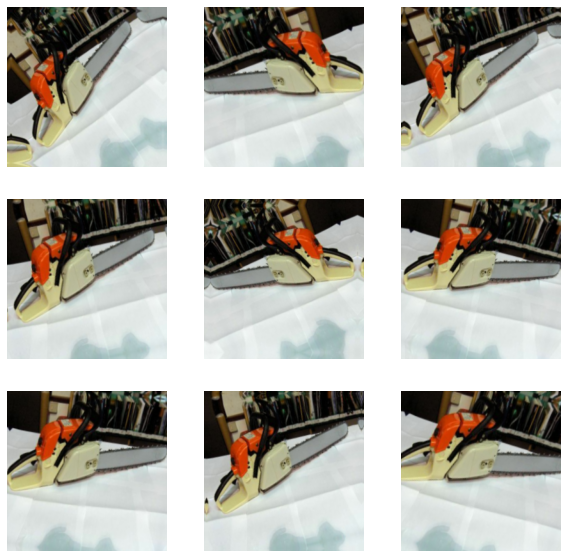

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Drop Out**

In [21]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

**Compile & Train model**

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 250, 250, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

In [25]:
epochs = 15
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/15
296/296 [==============================] - 652s 2s/step - loss: 1.8793 - accuracy: 0.3429 - val_loss: 1.5868 - val_accuracy: 0.4716
Epoch 2/15
296/296 [==============================] - 652s 2s/step - loss: 1.4037 - accuracy: 0.5373 - val_loss: 1.5498 - val_accuracy: 0.4958
Epoch 3/15
296/296 [==============================] - 652s 2s/step - loss: 1.2276 - accuracy: 0.5938 - val_loss: 1.2326 - val_accuracy: 0.5990
Epoch 4/15
296/296 [==============================] - 651s 2s/step - loss: 1.1130 - accuracy: 0.6310 - val_loss: 1.2011 - val_accuracy: 0.5987
Epoch 5/15
296/296 [==============================] - 656s 2s/step - loss: 1.0528 - accuracy: 0.6561 - val_loss: 1.1705 - val_accuracy: 0.6211
Epoch 6/15
296/296 [==============================] - 650s 2s/step - loss: 0.9883 - accuracy: 0.6773 - val_loss: 1.1803 - val_accuracy: 0.6242
Epoch 7/15
296/296 [==============================] - 650s 2s/step - loss: 0.9416 - accuracy: 0.6932 - val_loss: 1.0648 - val_accuracy: 0.6545

**Visualization**

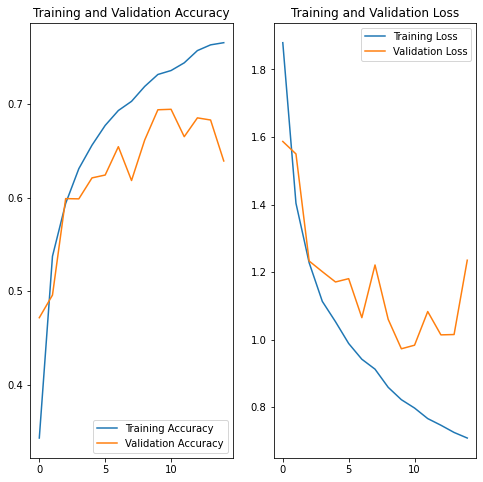

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now that the data augmentation has been performed through by random adjustments to the images to create more data, the plot shows that although the training accuracy increased linearly, it achieved around 77% which is less than the before. However, the validation accuracy has improved considerably reaching 69% at its peak at the 11th epoch and decreased slightly to 64%. The performance is also reflected in the loss for both training and validation datasets.